# CISC 367 Midterm Messy Notebook

<em> Ishaan Thakker </em>

* When first coming up with exactly what I wanted my research to include one stock such as APPL and the S&P 500 index
* Using this idea and inspiration from Dr. Bart I realized that it was probably a good idea to include many different companies and analyze them to possibly compare different parts of the market, where the risk is and isn't

Copy over details from midterm background and add more definitions and insight on analysis

Set up the data



In [43]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#Apple 
AAPL = pd.read_csv("data/AAPL.csv")
#Microsoft 
MSFT = pd.read_csv("data/MSFT.csv")
#Tesla
TSLA = pd.read_csv("data/TSLA.csv")
#Nike
NKE = pd.read_csv("data/NKE.csv")
#Gamestop
GME = pd.read_csv("data/GME.csv")
#S&P 500
SP500 = pd.read_csv("data/constituents_csv.csv")

AAPL.sort_values(by = ['Date'], inplace = True, ascending = False)
MSFT.sort_values(by = ['Date'], inplace = True, ascending = False)
TSLA.sort_values(by = ['Date'], inplace = True, ascending = False)
NKE.sort_values(by = ['Date'], inplace = True, ascending = False)
GME.sort_values(by = ['Date'], inplace = True, ascending = False)
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10162 entries, 10161 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10162 non-null  object 
 1   Open       10161 non-null  float64
 2   High       10161 non-null  float64
 3   Low        10161 non-null  float64
 4   Close      10161 non-null  float64
 5   Adj Close  10161 non-null  float64
 6   Volume     10161 non-null  float64
dtypes: float64(6), object(1)
memory usage: 635.1+ KB


In [44]:
sec_list = SP500["Sector"].unique()
print(len(sec_list))
sec_list

11


array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

Using Stock Market Data

In [45]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
10161,2021-04-01,123.660004,124.180000,122.489998,123.000000,123.000000,74957400.0
10160,2021-03-31,121.650002,123.519997,121.150002,122.150002,122.150002,118323800.0
10159,2021-03-30,120.110001,120.400002,118.860001,119.900002,119.900002,85671900.0
10158,2021-03-29,121.650002,122.580002,120.730003,121.389999,121.389999,80819200.0
10157,2021-03-26,120.349998,121.480003,118.919998,121.209999,121.209999,93958900.0


### What can we learn from a particular stocks change in price over time?

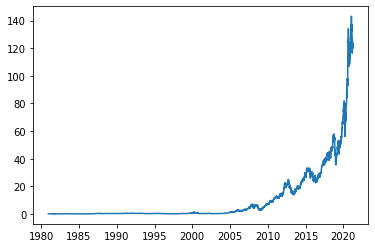

In [46]:
#FIX: Figure out how to plot with certain dates
AAPL_price = AAPL.copy()
AAPL_price['Date'] = pd.to_datetime(AAPL_price['Date'], format = '%Y-%m-%d')
x = AAPL_price["Date"]
y = AAPL_price["Close"]
plt.plot(x,y)
plt.show()

<AxesSubplot:>

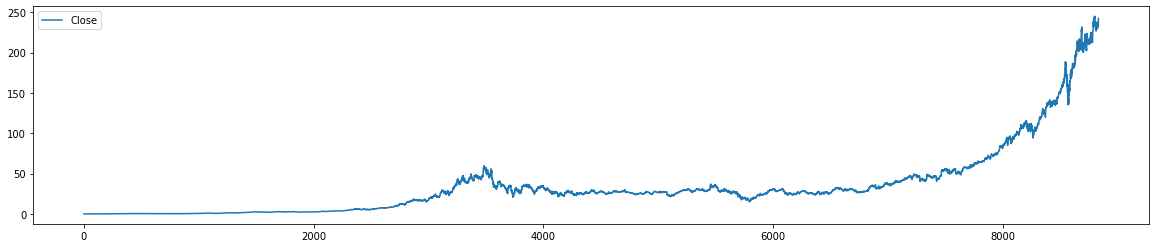

In [47]:
MSFT['Close'].plot(legend = True, figsize = (20,4))

<AxesSubplot:>

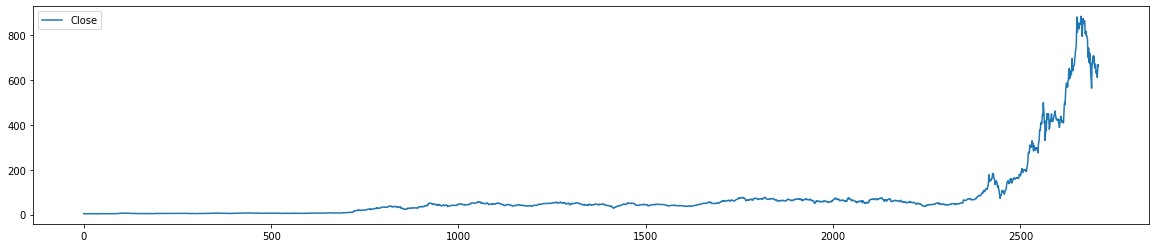

In [48]:
TSLA['Close'].plot(legend = True, figsize = (20,4))

<AxesSubplot:>

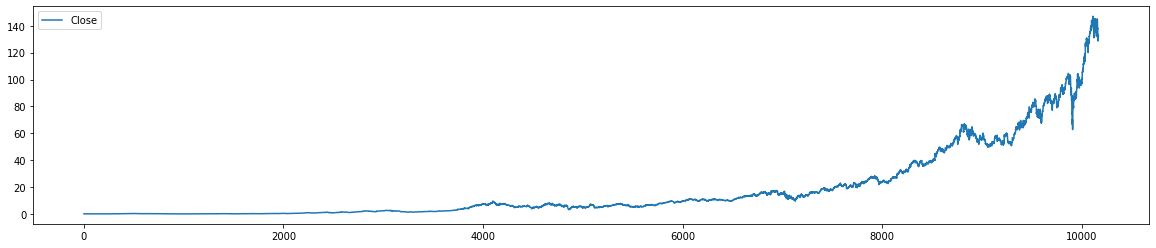

In [49]:
NKE['Close'].plot(legend = True, figsize = (20,4))

<AxesSubplot:>

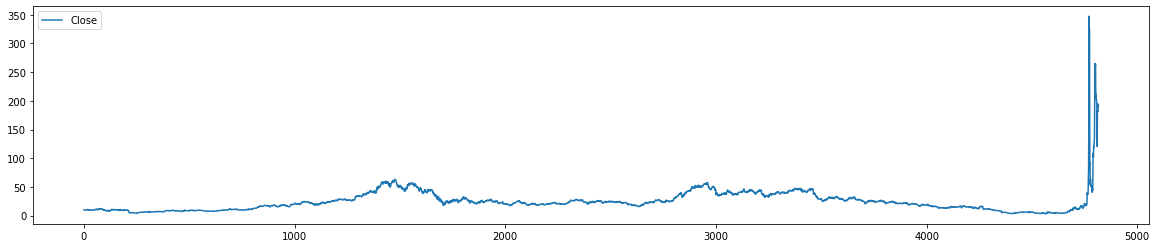

In [50]:
GME['Close'].plot(legend = True, figsize = (20,4))

* Similar trends appearing in all graphs, we can start to see that with time, barring any crisis to a company, the return will always be positive. 
* But this does not really tell us about the risk
* Look into short time intervals, lets say this past year is a good example since the pandemic affected the market greatly

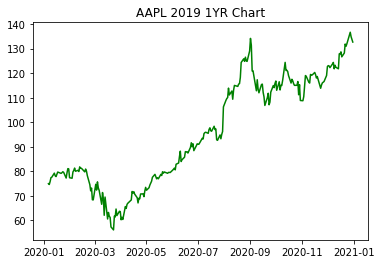

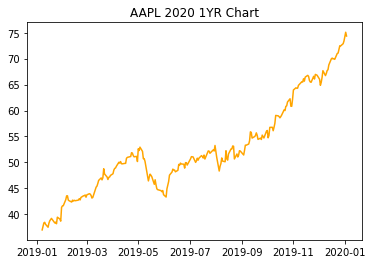

In [51]:
AAPL_short = AAPL.copy()
AAPL_short['Date'] = pd.to_datetime(AAPL_short['Date'], format = '%Y-%m-%d')
#AAPL.set_index('Date')
filtered = AAPL_short[(AAPL_short['Date'] > '2020-01-04') & (AAPL_short['Date'] < '2021-01-04')]
#filtered.set_index('Date')
x = filtered['Date']
y = filtered['Close']
plt.plot(x,y, color = "Green")
plt.title('AAPL 2019 1YR Chart')
plt.show()

filtered2 = AAPL_short[(AAPL_short['Date'] > '2019-01-04') & (AAPL_short['Date'] < '2020-01-04')]
x = filtered2['Date']
y = filtered2['Close']
plt.plot(x,y, color = "Orange")
plt.title('AAPL 2020 1YR Chart')
plt.show()

An important thing to realize, this past year was way volaitle than most, in 2019 there was not alot of movement in the market besides for a minor selloff in June. This shows how real life events such as the pandemic play a huge part in the market. The massive run-up that was experienced from July 2019 to March 2021 was drastically decreased around the time quarentine began. But it can also be seen that it did not take long for the market to recover. A smart investor would have compared the data from the previous years and decided that March 2020 was a great buying opportunity. But since AAPL is a very fundamentally strong stock it did not experience the type of selloff that other companies in the airline and retail industry experienced.

### What do moving average and daily return indicate about certain companies?

<AxesSubplot:>

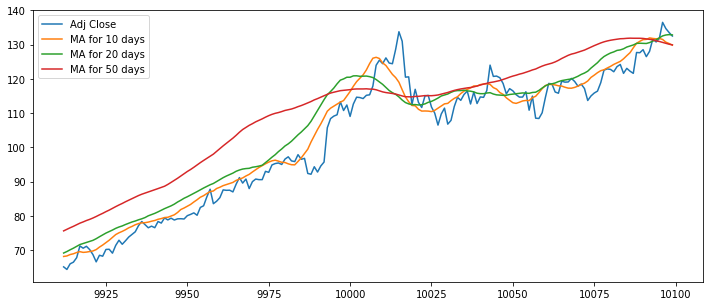

In [52]:
#Moving average calculations
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window = ma, center = False).mean()
AAPL.head(50)

#Filtering data and plotting moving averages
filtered = AAPL[(AAPL['Date'] > '2020-04-04') & (AAPL['Date'] < '2021-01-04')]
filtered[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (12,5))

This graph shows that after the March lows of the market, the moving averages follow a nice pattern for the rest of the year. The moving average technical indicator smooths out price trends by filtering out the “noise” from random short-term price fluctuations. When asset prices cross over their moving averages, it may generate a trading signal for technical traders. [More on moving averages](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)

In [53]:
#Daily Return Calculations
#Calculated by taking percent change over adjusted close prices
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].head()

10161         NaN
10160   -0.006911
10159   -0.018420
10158    0.012427
10157   -0.001483
Name: Daily Return, dtype: float64

<AxesSubplot:>

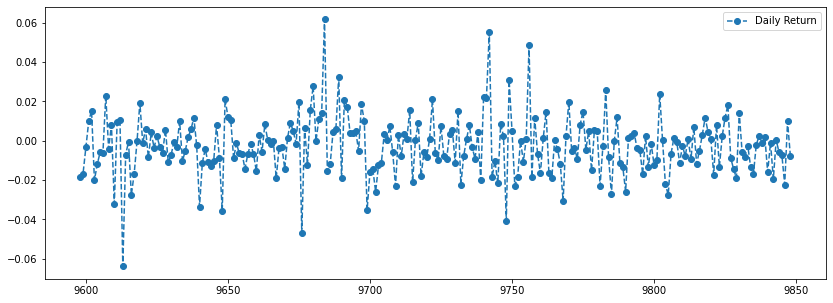

In [54]:
#Displaying daily return

AAPL['Date'] = pd.to_datetime(AAPL['Date'], format = '%Y-%m-%d')
filtered = AAPL[(AAPL['Date'] > '2019-01-04') & (AAPL['Date'] < '2020-01-04')]
filtered['Daily Return'].plot(figsize = (14,5), legend = True, linestyle = '--', marker = 'o')

c:\users\13023\cisc367-projects\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

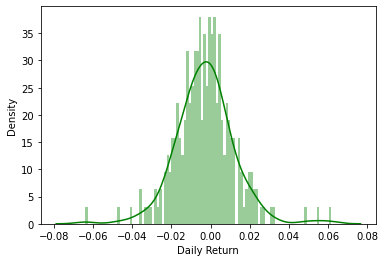

In [55]:
sns.distplot(filtered['Daily Return'].dropna(), bins = 100, color = 'green')

Stock prices change on a daily basis, altering the value of your investments. You may calculate daily stock returns to monitor the magnitude of this change. The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value. In this graph positive returns are more frequent than negative returns which is a good sign when choosing a stock.

### What is the correlation between daily returns of different stocks?

Now that we have analysis on daily returns for one it is time to select a few different ones and see what we can learn from it.

In [70]:
#Variety of different companies which are part of different sectors for the most part (besides AAPL and MSFT)
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()
NKE['Daily Return'] = NKE['Adj Close'].pct_change()
GME['Daily Return'] = GME['Adj Close'].pct_change()

#Remove unnecessary data first
AAPL_return = AAPL.drop(columns = ["Open", "High", "Low", "Close", "Volume", "MA for 10 days", "MA for 20 days", "MA for 50 days", "Daily Return"])
AAPL_return = AAPL_return.set_index(["Date"])
AAPL_return.rename(columns = {'Adj Close':'Adj Close_AAPL'}, inplace = True)

MSFT_return = MSFT.drop(columns = ["Open", "High", "Low", "Close", "Volume", "Daily Return"])
MSFT_return = MSFT_return.set_index(["Date"])
MSFT_return.rename(columns = {'Adj Close':'Adj Close_MSFT'}, inplace = True)

TSLA_return = TSLA.drop(columns = ["Open", "High", "Low", "Close", "Volume", "Daily Return"])
TSLA_return = TSLA_return.set_index(["Date"])
TSLA_return.rename(columns = {'Adj Close':'Adj Close_TSLA'}, inplace = True)

NKE_return = NKE.drop(columns = ["Open", "High", "Low", "Close", "Volume", "Daily Return"])
NKE_return = NKE_return.set_index(["Date"])
NKE_return.rename(columns = {'Adj Close':'Adj Close_NKE'}, inplace = True)

GME_return = GME.drop(columns = ["Open", "High", "Low", "Close", "Volume", "Daily Return"])
GME_return = GME_return.set_index(["Date"])
GME_return.rename(columns = {'Adj Close':'Adj Close_GME'}, inplace = True)

#AAPL_return.head()
#MSFT_return.head()
#TSLA_return.head()
#NKE_return.head()
#GME_return.head()

#Create one combined dataset which includes all 
combined = pd.concat([AAPL_return, MSFT_return, TSLA_return, NKE_return, GME_return])
combined.head()

#sns.jointplot('AAPL', 'AAPL', AAPL['Daily Return'], kind='scatter', color = 'red')

,Adj Close_AAPL,Adj Close_MSFT,Adj Close_TSLA,Adj Close_NKE,Adj Close_GME
Date,,,,,
2021-04-01 00:00:00,123.000000,NaN,NaN,NaN,NaN
2021-03-31 00:00:00,122.150002,NaN,NaN,NaN,NaN
2021-03-30 00:00:00,119.900002,NaN,NaN,NaN,NaN
2021-03-29 00:00:00,121.389999,NaN,NaN,NaN,NaN
2021-03-26 00:00:00,121.209999,NaN,NaN,NaN,NaN


### How much value do we put at risk by investing in a particular company?

A really simple way to calculate risk is to compare expected return of a company with the standard deviation of the daily returns.

In [57]:
#AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
#AAPL['Daily Return'].tail()
#sns.displot(AAPL['Daily Return'].dropna(),bins = 50, color = 'purple')